In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/5rovic/tar-project/main/code/data/essays.csv"
df = pd.read_csv(url, encoding="cp1252")

df.head()

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",n,y,y,n,y
1,1997_605191.txt,"Well, here we go with the stream of consciousn...",n,n,y,n,n
2,1997_687252.txt,An open keyboard and buttons to push. The thin...,n,y,n,y,y
3,1997_568848.txt,I can't believe it! It's really happening! M...,y,n,y,y,n
4,1997_688160.txt,"Well, here I go with the good old stream of co...",y,n,y,n,y


In [2]:
traits = {'cEXT': 'extraversion',
          'cNEU': 'neuroticism',
          'cAGR': 'agreeableness',
          'cCON': 'conscientiousness',
          'cOPN': 'openness'
          }

In [ ]:
X = df['TEXT']
y = df.iloc[:, 2:]

for label in y.columns:
  y[label] = y[label].map({'y': 1, 'n': 0})

In [5]:
df_binarized = pd.concat([X, y], axis=1)
df_binarized.head()

,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,"Well, right now I just woke up from a mid-day ...",0,1,1,0,1
1,"Well, here we go with the stream of consciousn...",0,0,1,0,0
2,An open keyboard and buttons to push. The thin...,0,1,0,1,1
3,I can't believe it! It's really happening! M...,1,0,1,1,0
4,"Well, here I go with the good old stream of co...",1,0,1,0,1


In [12]:
from sklearn.model_selection import train_test_split

X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, train_size=0.89, random_state=42)

print(len(X_train), len(X_val), len(X_test))
print(len(y_train), len(y_val), len(y_test))

1975 245 247
1975 245 247


In [16]:
y_train.head()

,cEXT,cNEU,cAGR,cCON,cOPN
331,1,0,0,0,1
1372,1,0,1,1,0
2093,0,1,0,0,1
1705,1,0,0,0,1
496,0,0,0,0,0


<Axes: >

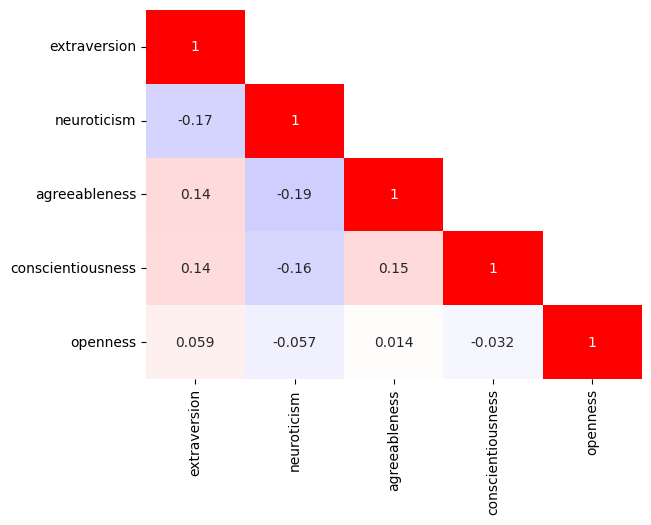

In [49]:
# KORELACIJSKA MATRICA

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr = y_train.corr().to_numpy()
mask = np.logical_xor(np.tril(np.ones_like(corr, dtype=bool)), np.diag(np.ones_like(corr, dtype=bool)))
labels = list(traits.values())
# sns.heatmap(corr[:-1, 1:], annot=True, cmap='bwr', mask=mask[:-1, 1:], cbar=False, xticklabels=labels[1:], yticklabels=labels[:-1])
sns.heatmap(corr, annot=True, cmap='bwr', vmin=-1, vmax=1, mask=mask, cbar=False, xticklabels=labels, yticklabels=labels)

extraversion         0.509873
neuroticism          0.499241
agreeableness        0.531646
conscientiousness    0.497722
openness             0.517468
dtype: float64


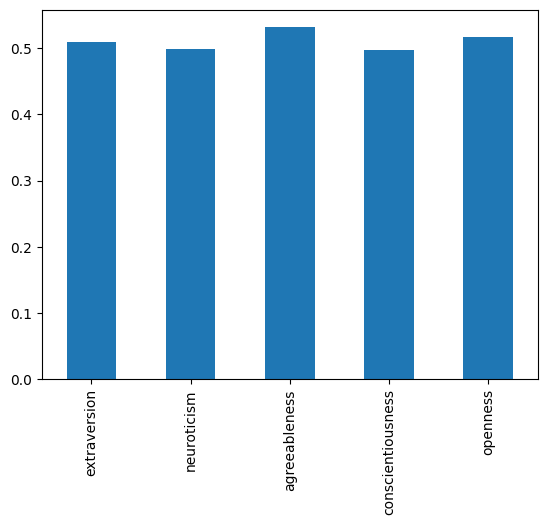

In [66]:
# ZASTUPLJENOST TRAITA

label_counts = y_train.sum(axis=0)
label_counts.rename(traits, inplace=True)
label_percentages = label_counts / len(y_train)
print(label_percentages)
ax = label_percentages.plot.bar()

0     49
1    281
2    623
3    621
4    347
5     54
dtype: int64


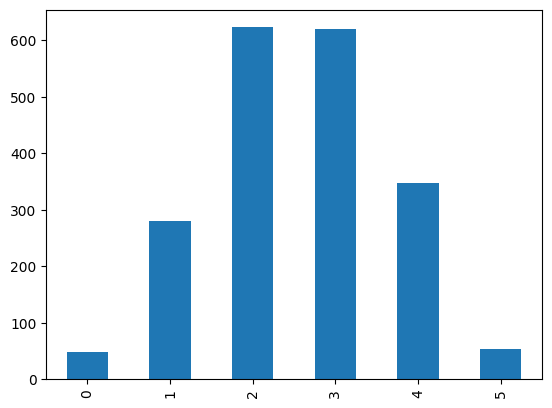

In [72]:
# KOLIKO PRIMJERA IMA S ODREDJENIM BROJEM TRAITOVA

traits_per_example = y_train.sum(axis=1)
how_many_traits = traits_per_example.value_counts().sort_index()
print(how_many_traits)
ax = how_many_traits.plot.bar()